<a href="https://colab.research.google.com/github/OrionAerospace/CubeDesign-Practice/blob/main/cubedesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praticando Técnicas de Ciências de Dados com a Proposta do Cube Design 2021

### [Orion Aerospace Design](orionaerospace.com.br) - 2022

### [Repositório](https://github.com/OrionAerospace/CubeDesign-Practice)

## Análise Descritiva

### Bibliotecas

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt;
import plotly.express as px;

!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 48.9 MB/s 
     |████████████████████████████████| 16.7 MB 64.4 MB/s 


### Obtendo Dados

Para facilitar o compartilhamento dos dados, a planilha original está no repositório do GitHub

In [2]:
sat_data = pd.read_csv("https://raw.githubusercontent.com/OrionAerospace/CubeDesign-Practice/main/nanosatc-br2.csv", sep=',', decimal='.')

sat_data.head()

,et,lat,lon,obcflags,batt,curr,txforward2,txcurr,rxcurr,rxdoppler,rxrssi,txreflected,txforward,txtemp,txvoltage,antsA,antsB,localtime,boardtime
0,COESU,-34.590,-58.958,007d,8.286,0.067,75.526390,0,0.057,413.0,942.0,0.003824,0.005975,-0.322581,8.080645,0100,0100,2021-03-23 12:17:30,2020-12-10 07:22:26
1,COESU,-30.878,-59.908,007d,8.286,0.067,75.598090,0,0.058,412.0,952.0,0.003824,0.005975,0.000000,8.064516,0100,0100,2021-03-23 12:18:30,2020-12-10 07:23:26
2,COESU,-30.259,-60.061,007d,8.286,0.067,75.616015,0,0.057,413.0,953.0,0.003824,0.005975,0.322581,8.096774,0100,0100,2021-03-23 12:18:40,2020-12-10 07:23:41
3,COESU,-29.020,-60.363,007d,8.296,0.067,75.633940,0,0.058,411.0,949.0,0.003824,0.005975,0.322581,8.048387,0100,0100,2021-03-23 12:19:00,2020-12-10 07:23:56
4,COESU,-23.445,-61.661,007d,8.296,0.067,75.741490,0,0.058,412.0,947.0,0.003824,0.005975,1.290323,8.096774,0100,0100,2021-03-23 12:20:30,2020-12-10 07:25:26


#### Nome das colunas

In [3]:
columns_name = sat_data.columns.values

columns_name

array(['et', 'lat', 'lon', 'obcflags', 'batt', 'curr', 'txforward2',
       'txcurr', 'rxcurr', 'rxdoppler', 'rxrssi', 'txreflected',
       'txforward', 'txtemp', 'txvoltage', 'antsA', 'antsB', 'localtime',
       'boardtime'], dtype=object)

### Funções úteis

Quando possível, refatorar para receber listas com colunas

In [4]:
def select_data(data, column_name):
    """Recebe um conjunto de dados data e uma string column_name e retorna data[column_name]"""
    if column_name not in data:
        return f"{column_name} não é uma coluna existente no dataset"
    return data[column_name]

In [5]:
def absolute_frequence(data, column_name):
    """Recebe um conjunto de dados data e uma string column_name, seleciona a column_name em data e retorna a frequencia absoluta de cada resultado"""
    if column_name not in data:
        return f"{column_name} não é uma coluna existente no dataset"
    return select_data(data, column_name).value_counts()

In [6]:
def relative_frequence(data, column_name):
    """Recebe um conjunto de dados data e uma string column_name, seleciona a column_name em data e, 
    com base na frequência absoluta, retorna a frequência relativa"""
    if column_name not in data:
        return f"{column_name} não é uma coluna existente no dataset"
    absolute_frequences = absolute_frequence(data, column_name)
    relative_frequences = [100 * x / absolute_frequences.sum() for x in absolute_frequences]
    return dict(zip(absolute_frequences.index.values, relative_frequences))


In [65]:
def box_plot(data, columns_name):
    boxplot = px.box(data, y = columns_name)
    # boxplot = data.boxplot(column = columns_name)
    boxplot.show()

### Descrição Geral dos Dados

In [9]:
sat_data[:17].describe()

,lat,lon,batt,curr,txforward2,txcurr,rxcurr,rxdoppler,rxrssi,txreflected,txforward,txtemp,txvoltage
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,17.0,17.000000,1.700000e+01,17.000000,17.000000
mean,-23.619176,-46.086235,8.291882,0.066294,36.731207,0.0,0.057529,411.764706,949.0,0.004204,5.975000e-03,1.309298,8.086338
std,7.197307,11.862353,0.005073,0.001572,25.885673,0.0,0.000624,3.092924,4.5,0.000845,1.788112e-18,2.994685,0.017980
min,-34.590000,-61.661000,8.286000,0.063000,19.272960,0.0,0.056000,403.000000,942.0,0.003824,5.975000e-03,-5.806452,8.048387
25%,-29.020000,-59.298000,8.286000,0.067000,20.496640,0.0,0.057000,412.000000,945.0,0.003824,5.975000e-03,0.322581,8.080645
50%,-23.445000,-37.641000,8.296000,0.067000,20.496640,0.0,0.058000,413.000000,949.0,0.003824,5.975000e-03,2.258065,8.096774
75%,-17.562000,-36.323000,8.296000,0.067000,75.526390,0.0,0.058000,413.000000,952.0,0.003824,5.975000e-03,3.548387,8.096774
max,-11.983000,-34.640000,8.296000,0.067000,75.741490,0.0,0.058000,415.000000,955.0,0.005975,5.975000e-03,4.193548,8.112903


### Latitude e Longitude

Segundo o INPE, o satélite teve sua órbita sobre a América.

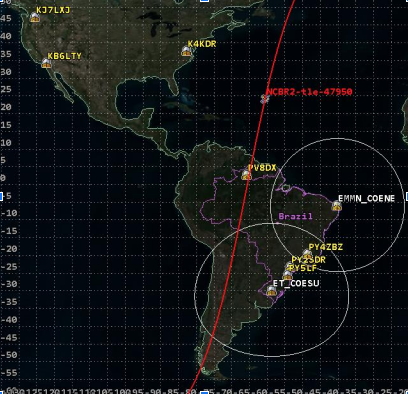]()

In [10]:
coordinates = [select_data(sat_data, 'lat'), select_data(sat_data, 'lon')]

In [13]:
fig = px.scatter_geo(
    coordinates,
    lat = coordinates[0],
    lon = coordinates[1],
)

fig.update_layout(
    title = 'Posição geográfica estimada do satélite'
)

fig.show()

### Box-Plots

In [66]:
box_plot(sat_data, ['lat', 'lon'])

In [67]:
box_plot(sat_data, 'batt')

In [68]:
box_plot(sat_data, ['curr', 'rxcurr'])
box_plot(sat_data, 'txcurr')
# box_plot(sat_data, )


# box_plot(sat_data, 'txforward')
# box_plot(sat_data, 'txforward2')
# box_plot(sat_data, 'txreflected')
# box_plot(sat_data, 'txtemp')
# box_plot(sat_data, 'txvoltage')

# 
#        'rxdoppler', 'rxrssi', 'txreflected',
#        'txtemp', 'txvoltage', 'antsA', 'antsB', 'localtime',
#        'boardtime'

In [69]:
box_plot(sat_data, ['txforward', 'txforward2'])

In [70]:
box_plot(sat_data, 'txreflected')

In [71]:
box_plot(sat_data, 'txtemp')

In [72]:
box_plot(sat_data, 'txvoltage')

In [73]:
box_plot(sat_data, 'rxdoppler')

In [74]:
box_plot(sat_data, 'rxrssi')